In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [2]:
tracts_df = pd.read_csv('./data/dataframes/final_tracts.csv')

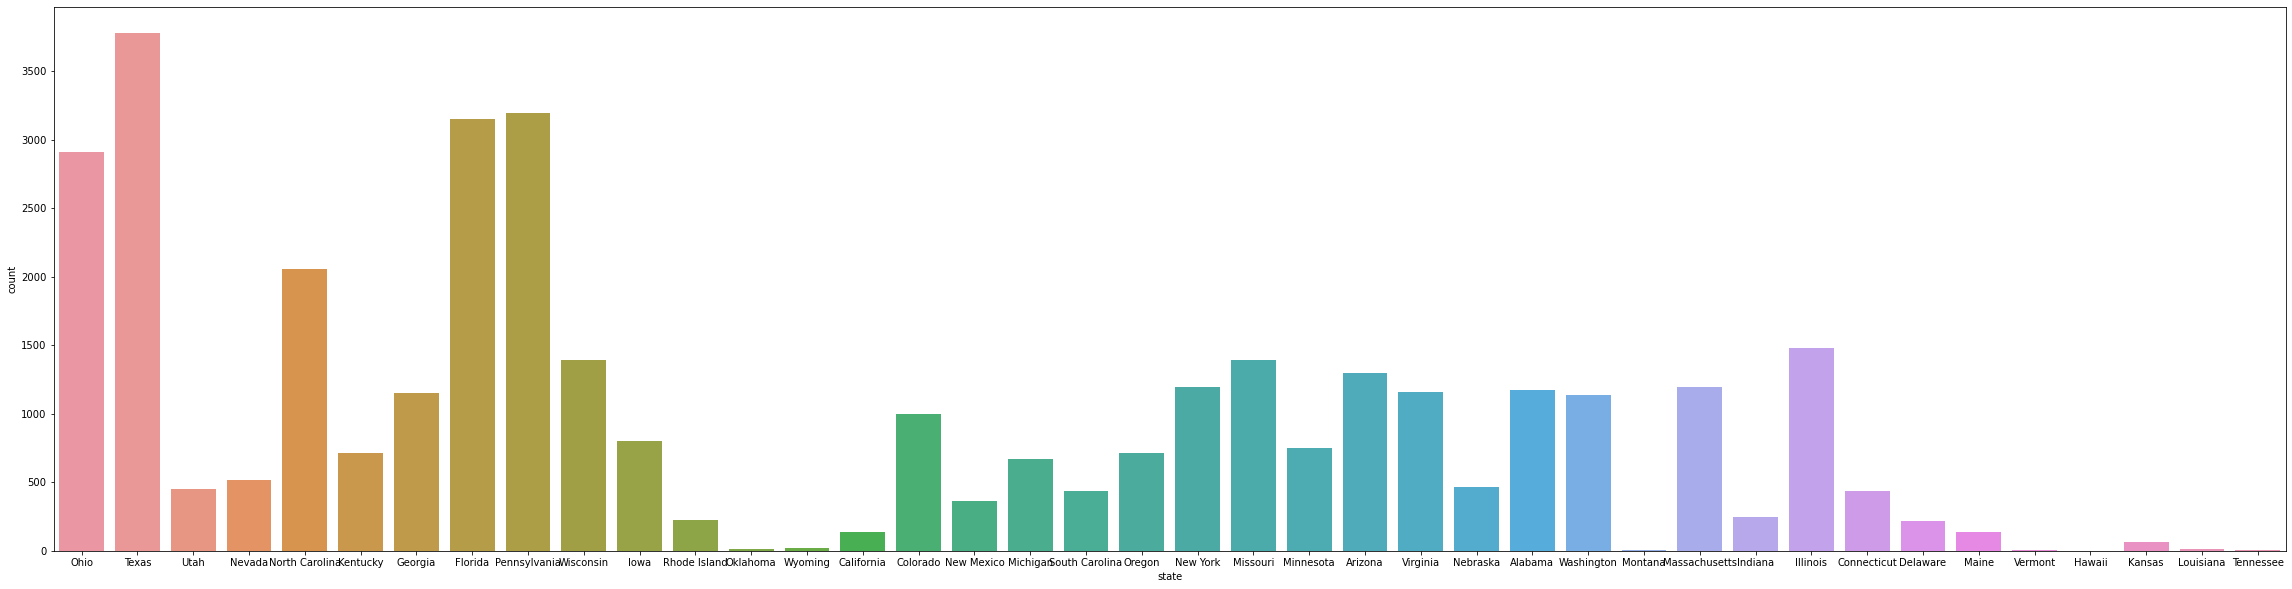

In [3]:
fig, ax = plt.subplots(figsize=(40, 10))
ax=sns.countplot('state', data=tracts_df)

In [4]:
tracts_df.state.value_counts()

Texas             3778
Pennsylvania      3197
Florida           3154
Ohio              2907
North Carolina    2059
Illinois          1482
Wisconsin         1392
Missouri          1390
Arizona           1294
Massachusetts     1196
New York          1194
Alabama           1173
Virginia          1156
Georgia           1150
Washington        1138
Colorado           999
Iowa               801
Minnesota          748
Oregon             715
Kentucky           714
Michigan           669
Nevada             517
Nebraska           469
Utah               448
South Carolina     438
Connecticut        433
New Mexico         367
Indiana            244
Rhode Island       224
Delaware           214
California         140
Maine              139
Kansas              61
Wyoming             17
Oklahoma            14
Louisiana           12
Vermont              5
Montana              5
Tennessee            4
Hawaii               1
Name: state, dtype: int64

In [5]:
drop_states = list(tracts_df.state.value_counts().keys()[-14:])

for index, row in tracts_df.iterrows():
    if row.state in drop_states:
        tracts_df.drop(index, inplace=True)

In [6]:
tracts_df.state.value_counts()

Texas             3778
Pennsylvania      3197
Florida           3154
Ohio              2907
North Carolina    2059
Illinois          1482
Wisconsin         1392
Missouri          1390
Arizona           1294
Massachusetts     1196
New York          1194
Alabama           1173
Virginia          1156
Georgia           1150
Washington        1138
Colorado           999
Iowa               801
Minnesota          748
Oregon             715
Kentucky           714
Michigan           669
Nevada             517
Nebraska           469
Utah               448
South Carolina     438
Connecticut        433
Name: state, dtype: int64

In [7]:
state_df = tracts_df.groupby(by='state').median()
state_df.head()

,Unnamed: 0,GEOID,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,median.property.value,rent.burden,...,pct.asian,pct.nh.pi,pct.multiple,pct.other,eviction.filings,evictions,eviction.rate,eviction.filing.rate,male,female
state,,,,,,,,,,,,,,,,,,,,,
Alabama,16372.0,1.079980e+09,3785.00,13.9400,395.00,26.130,623.960,38096.00,97600.0,28.80,...,0.21,0.00,0.950,0.00,9.0,5.0,1.4100,2.4600,48.3,51.7
Arizona,20923.0,4.013421e+09,3483.50,8.0725,325.00,23.355,733.000,45254.00,129050.0,26.45,...,1.45,0.05,1.455,0.08,25.0,14.0,4.7925,8.7625,49.3,50.7
Colorado,21291.0,8.043978e+09,3747.00,6.7300,380.50,28.220,918.000,55110.00,212100.0,28.55,...,1.40,0.01,1.530,0.04,15.5,10.0,2.7900,4.4300,49.8,50.2
Connecticut,22405.0,9.003405e+09,3984.47,3.3200,400.50,23.130,1049.000,72113.81,281800.0,28.60,...,2.66,0.00,1.070,0.00,9.0,6.5,1.9700,2.8800,48.3,51.7
Florida,14285.5,1.208600e+10,4160.00,9.5600,504.75,30.290,935.155,44004.00,138850.0,31.60,...,1.50,0.00,1.250,0.02,26.0,11.0,2.1550,5.2200,48.4,51.6


In [8]:
region_dict = {'pcf' : ['Oregon', 'Washington'],
'mt' : ['Nevada', 'Utah', 'Arizona', 'Colorado'],
'wnc' : ['Nebraska', 'Minnesota', 'Iowa', 'Missouri'],
'wsc' : ['Texas'],
'enc' : ['Wisconsin', 'Illinois', 'Michigan', 'Ohio'],
'ma' : ['Pennsylvania', 'New York'],
'ne' : ['Massachusetts', 'Connecticut'],
'sa' : ['Virginia', 'Georgia', 'South Carolina', 'Florida', 'North Carolina'],
'esc' : ['Alabama', 'Kentucky']}

state_list = list(tracts_df['state'])
region_list = []

for state in state_list:
    for key, value in region_dict.items():
        if state in value:
            region_list.append(key)
            
tracts_df['region'] = region_list

In [ ]:
sns.countplot('region', data=tracts_df)

## National EDA

In [ ]:
tracts_df[tracts_df['eviction.rate'] > 90 ]

In [9]:
tracts_df.drop(tracts_df[tracts_df['eviction.rate'] > 90].index, inplace=True)

**CLEANING**
- Eviction rates >= 90 are misleading, as these high rates are due to the fact that an eviction has occured in a census tract with a very low amount of renters (<5)
- I am dropping these values for the sake of extreme outlier removal

In [ ]:
sns.scatterplot('poverty.rate', 'eviction.rate', data=tracts_df)

In [ ]:
sns.distplot(tracts_df['poverty.rate'])

**OBSERVATION**
- eviction rate seems to decerease as poverty rate increases, which seems counterintuitive 
- this could be due to the fact that ~80% of the data has a poverty rate below 20%

In [ ]:
sns.scatterplot('poverty.rate', 'eviction.filing.rate', data=tracts_df)

In [ ]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=tracts_df)

In [ ]:
sns.scatterplot('pct.af.am', 'rent.burden', data=tracts_df)

In [106]:
tracts_df

,Unnamed: 0,name,state,GEOID,population,poverty.rate,renter.occupied.households,pct.renter.occupied,median.gross.rent,median.household.income,...,pct.multiple,pct.other,eviction.filings,evictions,eviction.rate,eviction.filing.rate,male,female,region,ef
0,0,1.01_Ashtabula County,Ohio,3.900700e+10,4824.00,15.92,482.0,31.30,377.0,32277.0,...,1.47,0.00,20.0,7.0,1.82,4.270,66.7,33.3,enc,0.350000
1,1,1.01_Brazos County,Texas,4.804100e+10,6122.16,11.20,728.0,24.73,880.0,58634.0,...,0.79,0.00,17.0,6.0,0.82,2.340,48.4,51.6,wsc,0.352941
2,2,1.01_Cache County,Utah,4.900500e+10,4872.00,6.68,285.0,15.23,673.0,52075.0,...,0.49,0.00,4.0,3.0,1.05,1.395,50.4,49.6,mt,0.750000
3,3,1.01_Clark County,Nevada,3.200300e+10,6757.00,11.76,485.0,26.17,1189.0,46843.0,...,1.26,0.00,43.0,24.0,4.84,8.680,50.5,49.5,mt,0.558140
4,4,1.01_Durham County,North Carolina,3.706300e+10,2895.00,28.02,481.5,47.89,694.0,35467.0,...,3.73,0.00,159.0,34.0,6.89,33.250,45.1,54.9,sa,0.213836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36053,36053,990.0_Kings County,New York,3.604710e+10,1473.00,10.88,209.0,41.76,1020.0,59306.0,...,0.00,0.00,15.0,8.0,3.80,7.130,46.2,53.8,ma,0.533333
36054,36054,992.0_Kings County,New York,3.604710e+10,1467.00,4.09,253.0,43.48,1193.0,69965.0,...,0.00,0.00,10.0,6.0,2.36,3.970,45.3,54.7,ma,0.600000
36055,36055,994.0_Kings County,New York,3.604710e+10,2195.00,3.85,295.0,49.31,1413.0,82903.0,...,0.00,0.00,31.0,9.0,3.07,10.590,50.5,49.5,ma,0.290323
36056,36056,996.0_Kings County,New York,3.604710e+10,3986.00,3.06,565.0,46.02,1266.0,67757.0,...,0.00,0.45,27.0,9.0,1.59,4.770,46.4,53.6,ma,0.333333


**OBSERVATION**
- 

In [ ]:
sns.scatterplot('pct.white', 'eviction.rate', data=tracts_df)

In [ ]:
sns.scatterplot('pct.white', 'rent.burden', data=tracts_df)

In [ ]:
sns.scatterplot('rent.burden', 'eviction.rate', data=tracts_df)

In [ ]:
sns.boxplot('poverty.rate', data=tracts_df)

In [ ]:
sns.boxplot('eviction.rate', data=tracts_df[tracts_df['eviction.rate'] < 100])

# Majority Ethnicity T-test

In [ ]:
from scipy.stats import ttest_ind

In [ ]:
maj_white = tracts_df[tracts_df['pct.white'] > 50.4]


min_white = tracts_df[tracts_df['pct.white'] <= 50.4]


In [ ]:
white_ttest = ttest_ind(maj_white['eviction.rate'], min_white['eviction.rate'])

In [ ]:
white_ttest

In [ ]:
print('Majority White Eviction Rate:', maj_white['eviction.rate'].median())
print('Minority White Eviction Rate:', min_white['eviction.rate'].median())

In [ ]:
sns.scatterplot('pct.white', 'eviction.rate', data=maj_white)

In [ ]:
sns.scatterplot('pct.white', 'eviction.rate', data=min_white)

In [ ]:
maj_afam = tracts_df[tracts_df['pct.af.am'] > 50.4]
min_afam = tracts_df[tracts_df['pct.af.am'] <= 50.4]

afam_ttest = ttest_ind(maj_afam['eviction.rate'], min_afam['eviction.rate'])

print(afam_ttest[1])
print('Majority Eviction Rate:', maj_afam['eviction.rate'].median())
print('Minority Eviction Rate:', min_afam['eviction.rate'].median())



In [ ]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=maj_afam)

In [ ]:
sns.scatterplot('pct.af.am', 'eviction.rate', data=min_afam)

In [ ]:
maj_hispanic = tracts_df[tracts_df['pct.hispanic'] > 50.4]
min_hispanic = tracts_df[tracts_df['pct.hispanic'] <= 50.4]

hispanic_ttest = ttest_ind(maj_hispanic['eviction.rate'], min_hispanic['eviction.rate'])

print(hispanic_ttest[1])
print('Majority Eviction Rate:', maj_hispanic['eviction.rate'].median())
print('Minority Eviction Rate:', min_hispanic['eviction.rate'].median())


In [ ]:
sns.scatterplot('pct.hispanic', 'eviction.rate', data=maj_hispanic)

In [ ]:
sns.scatterplot('pct.hispanic', 'eviction.rate', data=min_hispanic)

In [ ]:
maj_amind = tracts_df[tracts_df['pct.am.ind'] > 50.4]
min_amind = tracts_df[tracts_df['pct.am.ind'] <= 50.4]

amind_ttest = ttest_ind(maj_amind['eviction.rate'], min_amind['eviction.rate'])

print(amind_ttest[1])
print('Majority Eviction Rate:', maj_amind['eviction.rate'].median())
print('Minority Eviction Rate:', min_amind['eviction.rate'].median())


In [ ]:
maj_asian = tracts_df[tracts_df['pct.asian'] > 50.4]
min_asian = tracts_df[tracts_df['pct.asian'] <= 50.4]

asian_ttest = ttest_ind(maj_asian['eviction.rate'], min_asian['eviction.rate'])

print(asian_ttest[1])
print('Majority Eviction Rate:', maj_asian['eviction.rate'].median())
print('Minority Eviction Rate:', min_asian['eviction.rate'].median())


In [ ]:
maj_nhpi = tracts_df[tracts_df['pct.nh.pi'] > 50.4]
min_nhpi = tracts_df[tracts_df['pct.nh.pi'] <= 50.4]

nhpi_ttest = ttest_ind(maj_nhpi['eviction.rate'], min_nhpi['eviction.rate'])

print(nhpi_ttest[1])
print('Majority Eviction Rate:', maj_nhpi['eviction.rate'].median())
print('Minority Eviction Rate:', min_nhpi['eviction.rate'].median())


In [ ]:
maj_mult = tracts_df[tracts_df['pct.multiple'] > 50.4]
min_mult = tracts_df[tracts_df['pct.multiple'] <= 50.4]

mult_ttest = ttest_ind(maj_mult['eviction.rate'], min_mult['eviction.rate'])

print(mult_ttest[1])
print('Majority Eviction Rate:', maj_mult['eviction.rate'].median())
print('Minority Eviction Rate:', min_mult['eviction.rate'].median())


In [ ]:
maj_other = tracts_df[tracts_df['pct.other'] > 50.4]
min_other = tracts_df[tracts_df['pct.other'] <= 50.4]

other_ttest = ttest_ind(maj_other['eviction.rate'], min_other['eviction.rate'])

print(other_ttest[1])
print('Majority Eviction Rate:', maj_mult['eviction.rate'].median())
print('Minority Eviction Rate:', min_mult['eviction.rate'].median())


# Majority Gender T-test

In [ ]:
maj_male = tracts_df[tracts_df['male'] > 50.4]
min_male = tracts_df[tracts_df['male'] <= 50.4]

male_ttest = ttest_ind(maj_male['eviction.rate'], min_male['eviction.rate'])

print(male_ttest[1])
print('Majority Eviction Rate:', maj_male['eviction.rate'].median())
print('Minority Eviction Rate:', min_male['eviction.rate'].median())


In [ ]:
sns.scatterplot('male', 'eviction.rate', data=maj_male)

In [ ]:
sns.scatterplot('male', 'eviction.rate', data=min_male)

In [ ]:
sns.scatterplot('male', 'eviction.rate', data=tracts_df)

In [ ]:
maj_female = tracts_df[tracts_df['female'] > 50.4]
min_female = tracts_df[tracts_df['female'] <= 50.4]

female_ttest = ttest_ind(maj_female['eviction.rate'], min_female['eviction.rate'])

print(female_ttest[1])
print('Majority Eviction Rate:', maj_female['eviction.rate'].median())
print('Minority Eviction Rate:', min_female['eviction.rate'].median())


In [ ]:
sns.scatterplot('female', 'eviction.rate', data=tracts_df)

## State Level EDA


In [ ]:
state_df.reset_index(inplace=True)

In [ ]:
state_df

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot('eviction.rate', 'state', data=state_df.sort_values('eviction.rate', ascending=False))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot('eviction.filing.rate', 'state', data=state_df.sort_values('eviction.filing.rate', ascending=False))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot('renter.occupied.households', 'state', data=state_df.sort_values('renter.occupied.households',ascending=False))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot('poverty.rate', 'state', data=state_df.sort_values('poverty.rate', ascending=False))

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))

ax = sns.barplot('rent.burden', 'state', data=state_df.sort_values('rent.burden', ascending=False))

# More EDA

In [ ]:
sns.scatterplot('eviction.rate', 'eviction.filing.rate', data=tracts_df)

In [10]:
tracts_df['ef'] = tracts_df['evictions'] / tracts_df['eviction.filings']

In [12]:
tracts_df.fillna(0, inplace=True)

In [13]:
tracts_df['ef']

0        0.350000
1        0.352941
2        0.750000
3        0.558140
4        0.213836
           ...   
36053    0.533333
36054    0.600000
36055    0.290323
36056    0.333333
36057    0.379310
Name: ef, Length: 34606, dtype: float64

In [ ]:
sns.scatterplot('ef', 'eviction.rate', data=tracts_df)

# Modeling

### Checking Assumptions for Linear Regression

#### 1.  Multicullinearity

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data = tracts_df.corr(), center=0, annot=True)

**OBSERVATION**
1. Correlations .75 and above:
    - eviction.filings vs evitions
    - eviction.filings vs eviction.filings.rate
    - male vs female 
2. Dropping evictions and eviction.filing.rate as their values are reflected in eviction.filings
    - dropping renter.occupied.households (despite being slightly lower than 0.75) due to value being reflected in pct.renter.occupied
3. Dropping male column as insight will be inferrable based on findings of female variable 

In [14]:
model_df = tracts_df.drop(['evictions', 'eviction.filing.rate', 'renter.occupied.households', 
                           'Unnamed: 0', 'name', 'GEOID', 'male', 'pct.white', 'state'], axis=1)

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data = model_df.corr(), center=0, annot=True)

In [15]:
region_dummies = pd.get_dummies(tracts_df['region'], drop_first=True)
model_df = pd.concat([model_df, region_dummies], axis=1)
model_df.drop('region', axis=1, inplace=True)

In [16]:
 model_df.columns = model_df.columns.str.replace(".","_")

In [ ]:
model_df

## Linear Regression

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from statsmodels.formula.api import ols
import statsmodels.api as sm


In [18]:
def linreg_model(df, target):
    outcome = target
    predictors = df.drop(target, axis=1)
    predictor_variables = "+".join(predictors.columns)
    formula = outcome + '~' + predictor_variables
    model_baseline = ols(formula=formula, data=df).fit()
     
    X = model_df.drop("eviction_rate", axis = 1)
    y = model_df['eviction_rate']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

    baseline_linreg = LinearRegression()

    baseline_linreg.fit(X_train, y_train)

    y_pred = baseline_linreg.predict(X_test)

    residuals = y_pred - y_test
    
    
    mse_train = mean_squared_error(y_train, baseline_linreg.predict(X_train))
    mse_test = mean_squared_error(y_test, y_pred)

    residuals = model_baseline.resid
    fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

    print("Train RMSE:", np.sqrt(mse_train))
    print("Test RMSE:", np.sqrt(mse_test))
    print('Test Difference:', np.sqrt(mse_test) - np.sqrt(mse_train))
    fig.show()
    
    return model_baseline.summary()


In [ ]:
linreg_model(model_df, 'eviction_rate')

# Random Forrest 


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import math
import statistics as stat

In [20]:
def rf_report(classifier):
    
    # calculating variance
    var_train = explained_variance_score(y_train, classifier.predict(X_train_scaled))
    var_test = explained_variance_score(y_test, classifier.predict(X_test_scaled))
    
    #calculating max error
    max_error_train = max_error(y_train, classifier.predict(X_train_scaled))
    max_error_test = max_error(y_test, classifier.predict(X_test_scaled))
    
    #calculating RMSE
    rmse_train = math.sqrt(mean_squared_error(y_train, classifier.predict(X_train_scaled)))
    rmse_test = math.sqrt(mean_squared_error(y_test, classifier.predict(X_test_scaled)))
    
    #calculating R2
    r_sq_train = r2_score(y_train, classifier.predict(X_train_scaled))
    r_sq_test = r2_score(y_test, classifier.predict(X_test_scaled))
 

    #printing scores
    print('Variance --------------------------------------------')
    print('Train Variance: {}'.format(var_train))
    print('Test Variance: {}'.format(var_test))
    print('Max Error --------------------------------------------')
    print('Max Error Train: {}'.format(max_error_train))
    print('Max Error Test: {}'.format(max_error_test))
    print('RMSE --------------------------------------------')
    print('Train RMSE: {}'.format(rmse_train))
    print('Test RMSE: {}'.format(rmse_test))
    print('R2 --------------------------------------------')
    print('R2 Train: {}'.format(r_sq_train))
    print('R2 Test: {}'.format(r_sq_test))

    
    

In [21]:
X = model_df.drop("eviction_rate", axis = 1)
y = model_df['eviction_rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest Baseline

In [ ]:
forest_base = RandomForestRegressor()
forest_base_model = forest_base.fit(X_train_scaled, y_train)

In [ ]:
rf_report(forest_base)

In [ ]:
max_depth = []
for classifier in forest_base_model:
    max_depth.append(classifier.tree_.max_depth)

In [ ]:
stat.median(max_depth)

**OBSERVATION**
- While the training model is nearly completely learning the training data, it still achieves a good R2 on the testing data
- Overfitting occuring around depth of 31  

In [22]:
def plot_feature_importances_base(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')
    

In [ ]:
plot_feature_importances_base(forest_base_model)

**OBSERVATION**
- As expected, the random foreset model puts much more importance on the continuous features 
- Eviction filings are by the the most important feature 

## Random Forest v2

In [ ]:
forest_v2 = RandomForestRegressor()

param_grid = {'max_depth': [20, 25, 30],
             'min_samples_split': [10, 15, 20],
             'min_samples_leaf': [20, 30, 40]}

forest_v2_model = GridSearchCV(estimator = forest_v2, param_grid=param_grid, cv=3)
forest_v2_model.fit(X_train_scaled, y_train)

In [23]:
def report_grid(model):
    params = print(model.best_params_)
    print(params)
    return rf_report(model)

def plot_feature_importances(model):
    n_features = X_train.shape[1]
    plt.figure(figsize=(20,20))
    plt.barh(range(n_features), model.best_estimator_.feature_importances_, align='center') 
    plt.yticks(np.arange(n_features), X_train.columns.values) 
    plt.xlabel('Feature importance')
    plt.ylabel('Feature')

In [ ]:
report_grid(forest_v2_model)

**OBSERVATION**
- test R2 is lower by ~3% compared to baseline, but RMSE is lower 
- testset outperforms trainset in everything EXCEPT R2
    - this is most likely an indication of a well generalized model, however it is at the cost of a lower R2  

In [ ]:
plot_feature_importances(forest_v2_model)

## XGBoost

In [24]:
import xgboost
from xgboost import XGBRegressor

In [ ]:
xgb_base = XGBRegressor()
xgb_base_model = xgb_base.fit(X_train_scaled, y_train)

In [ ]:
rf_report(xgb_base)

In [ ]:
plot_feature_importances_base(xgb_base)

**OBSERVATION**
- This model is performing on par with the decision random forest basemodel
    - slightly higher R2, but slightly higher RMSE
- XGBoost is relying more on the cateogorical (region) features than the randomforest model 

In [ ]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X_train_scaled, y_train)

In [ ]:
report_grid(xgb_v2_model)

In [ ]:
plot_feature_importances(xgb_v2_model)

In [ ]:
ma = tracts_df[tracts_df['region'] == 'ma']

In [ ]:
sns.scatterplot('eviction.filings', 'eviction.rate', data=ma)

In [ ]:
sns.scatterplot('eviction.filings', 'eviction.rate', data=tracts_df)

In [ ]:
tracts_df[(tracts_df['eviction.rate'] > 8) & (tracts_df['evictions'] < 10)]

In [ ]:
y.describe()

## MLN 

In [25]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn import metrics


In [ ]:
base_nn = Sequential()
base_nn.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
base_nn.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

base_nn.compile(loss='mean_squared_error', optimizer='adam')
base_nn.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = base_nn.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


In [ ]:
print(r2_score(y_train, base_nn.predict(X_train_scaled)))
print(r2_score(y_test, base_nn.predict(X_test_scaled)))

### Deeper Network 

In [ ]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


In [ ]:
print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

### Different Features

1. Dropping 'population' so that features that are ratios of population (eviction.filing.rate) can be included in the model 

In [26]:
drop_pop_df = tracts_df.drop(['renter.occupied.households', 'pct.renter.occupied', 'ef', 'eviction.filings', 'Unnamed: 0', 'name', 'GEOID', 
                              'male', 'pct.white', 'state'], axis=1)

In [27]:
region_dummies = pd.get_dummies(drop_pop_df['region'], drop_first=True)
drop_pop_df = pd.concat([drop_pop_df, region_dummies], axis=1)
drop_pop_df.drop('region', axis=1, inplace=True)

In [28]:
X = drop_pop_df.drop("eviction.rate", axis = 1)
y = drop_pop_df['eviction.rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_base = XGBRegressor()
xgb_base_model = xgb_base.fit(X_train_scaled, y_train)

In [ ]:
rf_report(xgb_base)

In [ ]:
plot_feature_importances_base(xgb_base_model)

In [ ]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X_train_scaled, y_train)

In [ ]:
report_grid(xgb_v2_model)

In [ ]:
plot_feature_importances(xgb_v2_model)

## MLN 

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import optimizers
from sklearn import metrics


In [ ]:
base_nn = Sequential()
base_nn.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
base_nn.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

base_nn.compile(loss='mean_squared_error', optimizer='adam')
base_nn.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = base_nn.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


In [ ]:
print(r2_score(y_train, base_nn.predict(X_train_scaled)))
print(r2_score(y_test, base_nn.predict(X_test_scaled)))

### Deeper Network 

In [ ]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


In [ ]:
print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

### Wider Network 

In [ ]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1]*2, input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(25, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

In [ ]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1]*2, input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(25, activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer='adam')
nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

### Deeper Still

In [ ]:
nn_v2 = Sequential()
nn_v2.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(16, activation='relu'))
nn_v2.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v2.compile(loss='mean_squared_error', optimizer= optimizers.Adam(learning_rate = 0.005))
history = nn_v2.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
history_dict=history.history


In [ ]:
pred = nn_v2.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


print(r2_score(y_train, nn_v2.predict(X_train_scaled)))
print(r2_score(y_test, nn_v2.predict(X_test_scaled)))

In [ ]:
loss_values = history_dict['loss']
val_loss_values=history_dict['val_loss']
plt.figure(figsize=(20,13))
plt.plot(loss_values,'bo',label='training loss')
plt.plot(val_loss_values,'r',label='val training loss')

In [ ]:
history.history

In [ ]:
nn_v3 = Sequential()
nn_v3.add(Dense(X.shape[1], input_dim=X.shape[1], activation='relu'))
nn_v3.add(Dense(X.shape[1], activation='relu'))
nn_v3.add(Dense(X.shape[1], activation='relu'))
nn_v3.add(Dense(X.shape[1], activation='relu'))
nn_v3.add(Dense(X.shape[1]//2, activation='relu'))
nn_v3.add(Dense(1))

earlystopper = EarlyStopping(monitor='val_loss', min_delta=0, patience=15, verbose=2, mode='auto')

nn_v3.compile(loss='mean_squared_error', optimizer='adam')
nn_v3.fit(X_train_scaled, y_train, validation_split=0.1, callbacks=[earlystopper],
            verbose=2, epochs=500)

In [ ]:
pred = nn_v3.predict(X_test_scaled)
score = math.sqrt(metrics.mean_squared_error(pred,y_test))
print("Final score (RMSE): {}".format(score))


In [ ]:
print(r2_score(y_train, nn_v3.predict(X_train_scaled)))
print(r2_score(y_test, nn_v3.predict(X_test_scaled)))

# Outlier Detection and Removal

**OBSERVATION**
- Thus far the highest r2 values achieved have been 77% (achieved by MLN and XGBoost)
- Considering I have not removed any outliers that I have not assumed to be due to input error, detecting and removing these outliers could yield better results (hopefully at least r2 = 80% )

## Isolation Forest

- I am starting with Isolation Forset as it functions well with multi-dimensional data

In [ ]:
from sklearn.ensemble import IsolationForest

In [ ]:
y.describe()

In [ ]:
fig, ax = plt.subplots(figsize=(20, 5))
ax = sns.boxplot(y)

In [ ]:
outliers = y > 9

In [ ]:
len(y)/outliers.sum()

**OBSERVATION**
- Based on the boxplot and calculation above, approx 15% of eviction rates are outliers
- I will use this percentage as the contamination parameter for the isolation forest 

In [ ]:
isoforest = IsolationForest(contamination =0.15, n_estimators=model_df.shape[1], random_state=42)
isoforest_model =isoforest.fit(X)

eviction_rate_outliers = pd.Series(isoforest_model.predict(X))

In [ ]:
iso_tracts = drop_pop_df
iso_tracts.reset_index(inplace=True)
iso_tracts.drop('index', axis=1, inplace=True)

In [ ]:
for i in range(len(eviction_rate_outliers)):
    if eviction_rate_outliers[i] == -1:
        iso_tracts.drop(i, inplace=True)        
# https://stackoverflow.com/questions/56082166/delete-outliers-found-by-isolationforest-with-pandas-drop-rows

In [ ]:
X1 = drop_pop_df.drop("eviction.rate", axis = 1)
y1 = drop_pop_df['eviction.rate']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [ ]:
xgb_iso_base = XGBRegressor()
xgb_iso_base_model = xgb_iso_base.fit(X1_train_scaled, y1_train)

In [ ]:
rf_report(xgb_iso_base)

In [ ]:
xgb_iso_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_iso_v2_model = GridSearchCV(estimator = xgb_iso_v2, param_grid=param_grid, cv=3)
xgb_iso_v2_model.fit(X1_train_scaled, y1_train)

In [ ]:
report_grid(xgb_iso_v2_model)

In [ ]:
isoforest = IsolationForest(contamination =0.02, n_estimators=model_df.shape[1], random_state=42)
isoforest_model =isoforest.fit(X)

eviction_rate_outliers = pd.Series(isoforest_model.predict(X))

In [ ]:
iso_tracts = drop_pop_df
iso_tracts.reset_index(inplace=True)
iso_tracts.drop('index', axis=1, inplace=True)

In [ ]:
for i in range(len(eviction_rate_outliers)):
    if eviction_rate_outliers[i] == -1:
        iso_tracts.drop(i, inplace=True)        
# https://stackoverflow.com/questions/56082166/delete-outliers-found-by-isolationforest-with-pandas-drop-rows

In [ ]:
X2 = iso_tracts.drop("eviction_rate", axis = 1)
y2 = iso_tracts['eviction_rate']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
xgb_iso_base = XGBRegressor()
xgb_iso_base_model = xgb_iso_base.fit(X2_train_scaled, y2_train)

In [ ]:
r_sq_train = r2_score(y2_train, xgb_iso_base_model.predict(X2_train_scaled))
r_sq_test = r2_score(y2_test, xgb_iso_base_model.predict(X2_test_scaled))

In [ ]:
r_sq_train

In [ ]:
r_sq_test

In [ ]:
xgb_iso_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_iso_v2_model = GridSearchCV(estimator = xgb_iso_v2, param_grid=param_grid, cv=3)
xgb_iso_v2_model.fit(X2_train_scaled, y2_train)

In [ ]:
r_sq_train = r2_score(y2_train, xgb_iso_v2_model.predict(X2_train_scaled))
r_sq_test = r2_score(y2_test, xgb_iso_v2_model.predict(X2_test_scaled))

In [ ]:
print(r_sq_train)
print(r_sq_test)

In [ ]:
model_df

In [ ]:
isoforest = IsolationForest(contamination =0.075, n_estimators=model_df.shape[1], random_state=42)
isoforest_model =isoforest.fit(X)

eviction_rate_outliers = pd.Series(isoforest_model.predict(X))

In [ ]:
iso_tracts = model_df
iso_tracts.reset_index(inplace=True)
iso_tracts.drop('index', axis=1, inplace=True)

In [ ]:
for i in range(len(eviction_rate_outliers)):
    if eviction_rate_outliers[i] == -1:
        iso_tracts.drop(i, inplace=True)        
# https://stackoverflow.com/questions/56082166/delete-outliers-found-by-isolationforest-with-pandas-drop-rows

In [ ]:
X2 = iso_tracts.drop("eviction_rate", axis = 1)
y2 = iso_tracts['eviction_rate']

X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X2_train_scaled = scaler.fit_transform(X2_train)
X2_test_scaled = scaler.transform(X2_test)

In [ ]:
xgb_iso_base = XGBRegressor()
xgb_iso_base_model = xgb_iso_base.fit(X2_train_scaled, y2_train)

In [ ]:
r_sq_train = r2_score(y2_train, xgb_iso_base_model.predict(X2_train_scaled))
r_sq_test = r2_score(y2_test, xgb_iso_base_model.predict(X2_test_scaled))

In [ ]:
r_sq_train

In [ ]:
r_sq_test

In [ ]:
xgb_iso_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_iso_v2_model = GridSearchCV(estimator = xgb_iso_v2, param_grid=param_grid, cv=3)
xgb_iso_v2_model.fit(X2_train_scaled, y2_train)

In [ ]:
r_sq_train = r2_score(y2_train, xgb_iso_v2_model.predict(X2_train_scaled))
r_sq_test = r2_score(y2_test, xgb_iso_v2_model.predict(X2_test_scaled))

In [ ]:
print(r_sq_train)
print(r_sq_test)

In [ ]:
n_features = X2_train.shape[1]
plt.figure(figsize=(20,20))
plt.barh(range(n_features), xgb_iso_v2_model.best_estimator_.feature_importances_, align='center') 
plt.yticks(np.arange(n_features), X2_train.columns.values) 
plt.xlabel('Feature importance')
plt.ylabel('Feature')

In [ ]:
forest_base = RandomForestRegressor()
forest_base_model = forest_base.fit(X_train_scaled, y_train)

In [ ]:
rf_report(forest_base)

In [ ]:
max_depth = []
for classifier in forest_base_model:
    max_depth.append(classifier.tree_.max_depth)

In [ ]:
stat.median(max_depth)

In [ ]:
plot_feature_importances_base(forest_base_model)

# Permutation Importance

In [87]:
from sklearn.inspection import permutation_importance
clf = XGBRegressor(learning_rate=0.2,
                                max_depth=6,
                                min_child_weight=2,
                                sub_sample=0.5).fit(X_train_scaled, y_train)

result = permutation_importance(clf, X_test_scaled, y_test, n_repeats=10, random_state=0)

[15:17:37] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




In [88]:
result.importances_std

array([3.32116085e-03, 9.02014752e-04, 1.31310746e-03, 2.11214134e-03,
       3.65830451e-03, 2.15940300e-03, 3.95051425e-03, 1.03146350e-03,
       3.99915274e-04, 5.24567716e-04, 1.44194373e-04, 5.88939741e-04,
       3.39687271e-04, 5.81309807e-03, 1.64358278e-02, 3.93402431e-04,
       5.49784123e-05, 9.32643959e-04, 8.37426767e-04, 1.41791069e-04,
       4.37400773e-06, 5.01862023e-04, 5.35668981e-04, 1.79262640e-04])

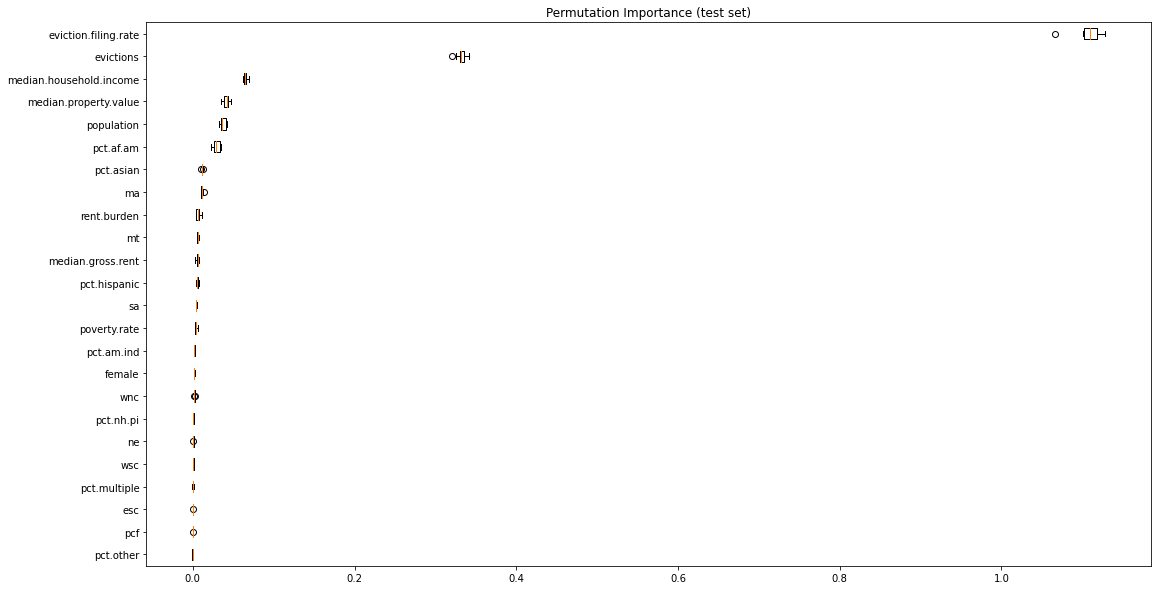

In [105]:
plt.subplots(figsize=(18,10))
feature_importance = clf.feature_importances_
sorted_idx = result.importances_mean.argsort()

plt.boxplot(result.importances[sorted_idx].T,
            vert=False, labels=np.array(X_train.columns)[sorted_idx])
plt.title("Permutation Importance (test set)")

plt.show()

In [98]:
feature_importance

array([0.01306199, 0.00575648, 0.0112601 , 0.00953688, 0.0253123 ,
       0.01217786, 0.01987485, 0.01565841, 0.01031583, 0.01294729,
       0.00425341, 0.00722492, 0.00563485, 0.02792471, 0.34928134,
       0.01153402, 0.00285247, 0.3126603 , 0.06158583, 0.00657343,
       0.00354482, 0.03107086, 0.01955521, 0.02040187], dtype=float32)

### Variance Threshold

In [60]:
from sklearn.feature_selection import SelectFromModel


In [ ]:
m = SelectFromModel(XGBRegressor(learning_rate=0.2,
                                max_depth=6,
                                min_child_weight=2,
                                sub_sample=0.5))

m.fit(X_train_scaled, y_train)

In [ ]:
m.transform(X_train_scaled).shape

In [ ]:
m.score(X_test_scaled, y_test)

In [ ]:
from sklearn.feature_selection import VarianceThreshold

In [ ]:
var_thresh=VarianceThreshold(threshold=0.4)
var_thresh.fit(X_train_scaled)
sum(var_thresh.get_support())

In [ ]:
var_thresh.get_support()

In [ ]:
constant_columns = [column for column in X.columns
                   if column not in X.columns[var_thresh.get_support()]]


In [ ]:
constant_columns

In [ ]:
feature_select_df = drop_pop_df
for col in constant_columns:
    feature_select_df.drop(col, axis=1, inplace=True)

In [ ]:
X = feature_select_df.drop("eviction.rate", axis = 1)
y = feature_select_df['eviction.rate']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
xgb_base = XGBRegressor()
xgb_base_model = xgb_base.fit(X_train_scaled, y_train)

In [ ]:
rf_report(xgb_base_model)

In [ ]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X_train_scaled, y_train)

In [ ]:
report_grid(xgb_v2_model)

### RFE

In [62]:
sel = SelectFromModel(xgb_perm)
sel.fit(X_train_scaled, y_train)

[14:17:18] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




SelectFromModel(estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                       colsample_bylevel=1, colsample_bynode=1,
                                       colsample_bytree=1, gamma=0, gpu_id=-1,
                                       importance_type='gain',
                                       interaction_constraints='',
                                       learning_rate=0.2, max_delta_step=0,
                                       max_depth=6, min_child_weight=2,
                                       missing=nan, monotone_constraints='()',
                                       n_estimators=100, n_jobs=0,
                                       num_parallel_tree=1, random_state=0,
                                       reg_alpha=0, reg_lambda=1,
                                       scale_pos_weight=1, sub_sample=0.5,
                                       subsample=1, tree_method='exact',
                                       validate_parame

In [65]:
constant_columns = [column for column in X.columns
                   if column not in X.columns[sel.get_support()]]


In [66]:
constant_columns

['population',
 'poverty.rate',
 'median.gross.rent',
 'median.household.income',
 'median.property.value',
 'rent.burden',
 'pct.af.am',
 'pct.hispanic',
 'pct.am.ind',
 'pct.asian',
 'pct.nh.pi',
 'pct.multiple',
 'pct.other',
 'evictions',
 'female',
 'esc',
 'ne',
 'pcf',
 'sa',
 'wnc',
 'wsc']

In [67]:
feature_select_df = drop_pop_df
for col in constant_columns:
    feature_select_df.drop(col, axis=1, inplace=True)

In [68]:
X1 = feature_select_df.drop("eviction.rate", axis = 1)
y1 = feature_select_df['eviction.rate']

X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.25, random_state = 25)

scaler = StandardScaler()

X1_train_scaled = scaler.fit_transform(X1_train)
X1_test_scaled = scaler.transform(X1_test)

In [69]:
xgb_v2 = XGBRegressor()

param_grid = {
    'learning_rate' : [0.1, 0.2],
    'max_depth': [4, 6, 8],
    'min_child_weight': [1, 2],
    'sub_sample': [0.5, 0.7],
    
}

xgb_v2_model = GridSearchCV(estimator = xgb_v2, param_grid=param_grid, cv=3)
xgb_v2_model.fit(X1_train_scaled, y1_train)

[14:21:13] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:14] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[14:21:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:26] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:27] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[14:21:38] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:39] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

[14:21:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:51] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:21:52] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1598185652448/work/src/learner.cc:516: 
Parameters: { sub_sample } might not be used.

  This may not be accurate due to some parameters are only used in langu

GridSearchCV(cv=3,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, gamma=None,
                                    gpu_id=None, importance_type='gain',
                                    interaction_constraints=None,
                                    learning_rate=None, max_delta_step=None,
                                    max_depth=None, min_child_weight=None,
                                    missing=nan, monotone_constraints=None,
                                    n_estimators=100, n_jobs=None,
                                    num_parallel_tree=None, random_state=None,
                                    reg_alpha=None, reg_lambda=None,
                                    scale_pos_weight=None, subsample=None,
                                    tree_method=None, validate_para

In [72]:
rmse_train = math.sqrt(mean_squared_error(y1_train, xgb_v2_model.predict(X1_train_scaled)))
rmse_test = math.sqrt(mean_squared_error(y1_test, xgb_v2_model.predict(X1_test_scaled)))
    
    #calculating R2
r_sq_train = r2_score(y1_train, xgb_v2_model.predict(X1_train_scaled))
r_sq_test = r2_score(y1_test, xgb_v2_model.predict(X1_test_scaled))

print(rmse_train)
print(rmse_test)
print(r_sq_train)
print(r_sq_test)

1.4166365423717366
1.5921519834148006
0.8336037644461947
0.7938966019783038


# Counterfactuals

In [35]:
pip install ceml

  Using cached ceml-0.6-py3-none-any.whl (90 kB)
  Using cached sklearn_lvq-1.1.1-py3-none-any.whl (38 kB)
  Using cached tensorflow-2.4.0-cp38-cp38-macosx_10_11_x86_64.whl (175.5 MB)
  Using cached scipy-1.4.1-cp38-cp38-macosx_10_9_x86_64.whl (28.8 MB)
  Using cached cvxpy-1.1.0.tar.gz (990 kB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Using cached scikit_learn-0.24.0-cp38-cp38-macosx_10_9_x86_64.whl (7.2 MB)
  Using cached torch-1.7.1-cp38-none-macosx_10_9_x86_64.whl (108.9 MB)
  Using cached jaxlib-0.1.55-cp38-none-macosx_10_9_x86_64.whl (41.7 MB)
Processing /Users/Jack/Library/Caches/pip/wheels/05/7a/4e/d06ceec983fcff6ee886eb08ad6394d9ca1535280fdecead22/jax-0.2.0-py3-none-any.whl
  Using cached typing_extensions-3.7.4.3-py3-none-any.whl (22 kB)
  Using cached tensorflow_estimator-2.4.0-py2.py3-none-any.whl (462 kB)
  Using cached grpcio-1.32.0-cp38-cp38-macosx_10_9_x86_64.whl (3.3 MB)
  Using cach

  ERROR: Command errored out with exit status 1:
   command: /Users/Jack/opt/anaconda3/envs/learn-env/bin/python /Users/Jack/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/pip/_vendor/pep517/_in_process.py build_wheel /var/folders/zy/c4nnbj150klf3b005qvxjbbr0000gn/T/tmpx0lss6ud
       cwd: /private/var/folders/zy/c4nnbj150klf3b005qvxjbbr0000gn/T/pip-install-nx1f9bh7/cvxpy
  Complete output (428 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.macosx-10.9-x86_64-3.8
  creating build/lib.macosx-10.9-x86_64-3.8/cvxpy
  copying cvxpy/error.py -> build/lib.macosx-10.9-x86_64-3.8/cvxpy
  copying cvxpy/__init__.py -> build/lib.macosx-10.9-x86_64-3.8/cvxpy
  copying cvxpy/settings.py -> build/lib.macosx-10.9-x86_64-3.8/cvxpy
  creating build/lib.macosx-10.9-x86_64-3.8/examples
  copying examples/ex_5_1.py -> build/lib.macosx-10.9-x86_64-3.8/examples
  copying examples/matrix_games_LP.py -> build/lib.macosx-10.9-x86_64-3.8/examples

Note: you may need to restart the kernel to use updated packages.


In [37]:
from ceml.sklearn import generate_counterfactual

ModuleNotFoundError: No module named 'ceml'